# Heavy Traffic Indicators Project

## Introduction

 Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. In this project we will analyse the factors that impact the traffic the most, based on the "Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume." data-set available at the [Link] (https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).  

 The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## The I-94 Traffic Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


## Traffic Volume Column Histogram

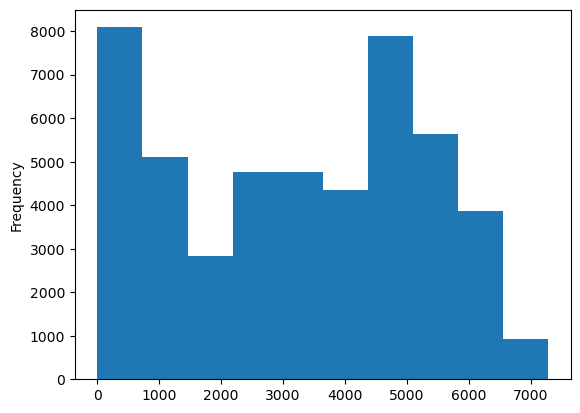

In [4]:
traffic["traffic_volume"].plot.hist()
plt.show()

In [5]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Traffic Volume: Day vs Night

The description above tells us that about 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. About 75% of the time, the traffic volume was 4,933 cars or fewer. The remaining 25% of the time, the traffic volume exceeded 4,933 cars. This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

**Convert the date_time column to a datetime series**

In [6]:
traffic["date_time"]= pd.to_datetime(traffic["date_time"])

In [7]:
traffic["date_time"]

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [8]:
day_time = traffic.copy()[(7 <= traffic["date_time"].dt.hour) & (traffic["date_time"].dt.hour < 19)]
night_time = traffic.copy()[~((7 <= traffic["date_time"].dt.hour) & (traffic["date_time"].dt.hour < 19))]

**Histogram for the traffic_volume in day_time and night_time**

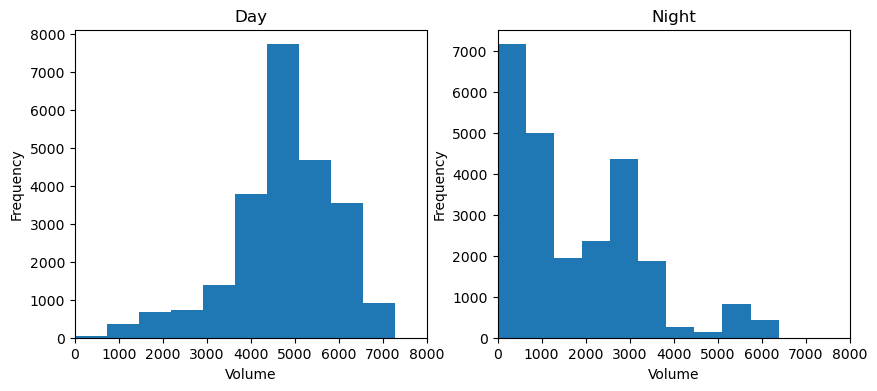

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(day_time["traffic_volume"])
plt.title("Day")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.xlim([0,8000])

plt.subplot(1,2,2)
plt.hist(night_time["traffic_volume"])
plt.title("Night")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.xlim([0,8000])

plt.show()

In [10]:
day_time["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night_time["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

**Graph descriptions**

We could say that the day-time graph shows a negatively-skewed data (left skewed) while the night-time graph shows a positively-skewed (right skewed) data. What this means in terms of our volume-frequency function graphs:
* The greater traffic_volume values appear more frequent during the day, meaning that during the day it is more common to have a greater volume of traffic.
* During night, the traffic_volume tends to be more frequent around the low volumes, meaning it is more common to have fewer cars driving at night.

This leads us to the following optimisation of future analysis process - since our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## The Effect Of Month, Day And Hour On The Traffic 

**Traffic during different months**

In [12]:
day_time["month"] = day_time["date_time"].dt.month
by_month = day_time.groupby('month').mean(numeric_only = True)
by_month["traffic_volume"]

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

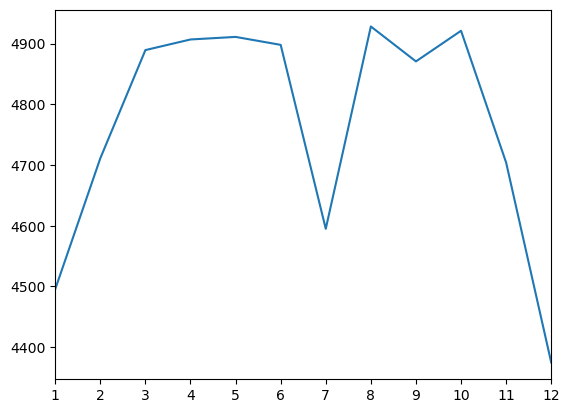

In [13]:
plt.plot(by_month["traffic_volume"])
plt.xlim([1,12])
plt.xticks(ticks=range(1,13))
plt.show()

The traffic during the spring and summer is on average greater than 4800 cars per day, with an exception being July. November, December, January and February show lower values than 4800 cars per day (Dec being the minimum with below 4400 cars per day). We might hypothesise these low values for happening due to school vacations, holidays and weather (Minesota being known for cold and snowy winters).

Let's analyse July to understand why it is lower.

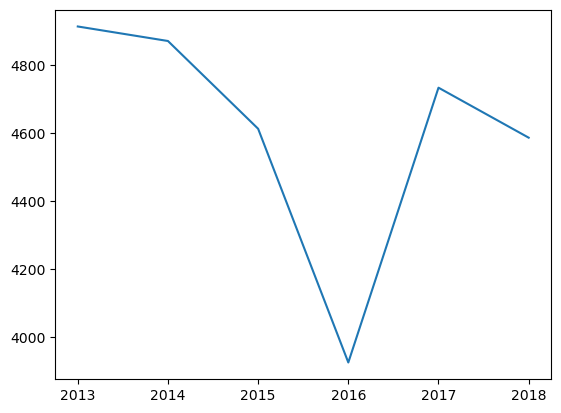

In [14]:
day_time["year"] = day_time["date_time"].dt.year
july_data = day_time[day_time["month"] == 7]
julies = july_data.groupby('year').mean(numeric_only=True)["traffic_volume"]
plt.plot(julies)
plt.show()


As a conclusion we can say that usually Jully has as high values as the other summer months. The 2016 road constructions might have been the cause of the exceptional drop in values. 

**Traffic during different days of the week**

In [15]:
day_time["day"] = day_time["date_time"].dt.weekday
by_day = day_time.groupby("day").mean(numeric_only=True)
by_day["traffic_volume"]

# 0 weekday is Monday

day
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

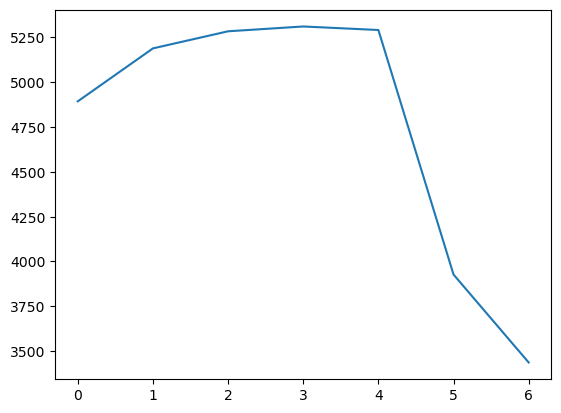

In [16]:
plt.plot(by_day["traffic_volume"])
plt.show()

As a conclusion we could say that the working days are busier than the weekends. For further work, we should eliminate all the weekend data. 

**Filter the business/working days only**

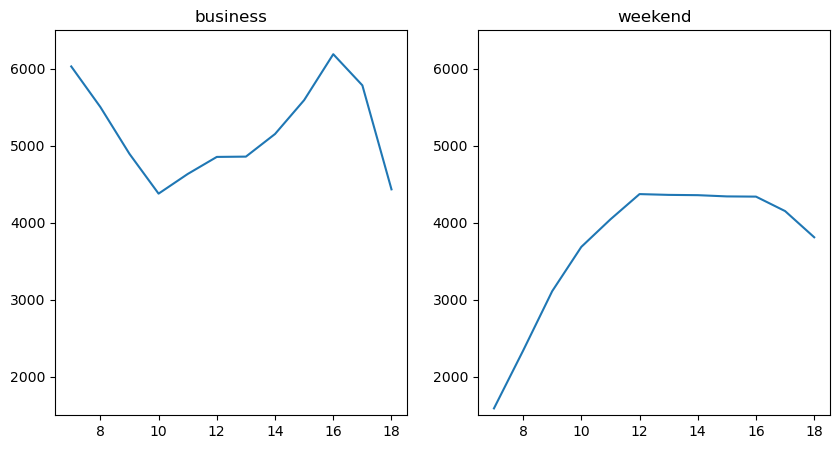

In [26]:
bool_series = day_time["day"] < 5
day_time_business = day_time.copy()[bool_series]
day_time_weekend = day_time.copy()[~bool_series]

day_time_business["hour"] = day_time_business["date_time"].dt.hour
day_time_weekend["hour"] = day_time_weekend["date_time"].dt.hour

by_hour_business = day_time_business.copy().groupby("hour").mean(numeric_only = True)
by_hour_weekend = day_time_weekend.copy().groupby("hour").mean(numeric_only = True)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(by_hour_business["traffic_volume"])
plt.title("business")
plt.ylim(1500,6500)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.title("weekend")
plt.ylim(1500,6500)
plt.show()

**Time indicators conclusions**

The heaviest traffic occur during the warm seasons (from March to October, with 2016 being an outlier for July due to constructions). The day of the week dimension filters for the heaviest traffic only during the business days. And the hours that represent the highest traffic_volumes are 7-8 and 15-17. 

## Weather Indicators And Their Effect On Traffic

In [27]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


0.0036965098350734416 0.001265349847175988 -0.03293234866163945 0.12831656852303902


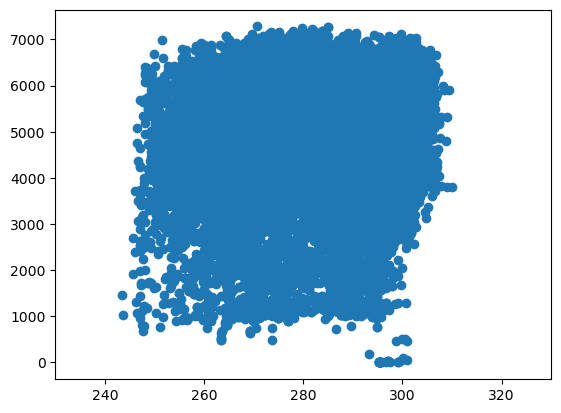

In [37]:
corr1 = day_time["rain_1h"].corr(day_time["traffic_volume"])
corr2 = day_time["snow_1h"].corr(day_time["traffic_volume"])
corr3 = day_time["clouds_all"].corr(day_time["traffic_volume"])
corr4 = day_time["temp"].corr(day_time["traffic_volume"])

print(corr1, corr2, corr3, corr4)

#Since the corr3 depicting the Pearson's r between traffic volume and clouds_all is the greatest, we'll scatter plot it

plt.scatter(day_time["temp"], day_time["traffic_volume"])
plt.xlim([230,330])
plt.show()

*I would't consider these columns very reliable in spotting the factors that cause heavy traffic due to small values for the Pearson's r.*

**Weather Types And The Impact On Traffic**

             temp    rain_1h    snow_1h  clouds_all  traffic_volume  \
count   11.000000  11.000000  11.000000   11.000000       11.000000   
mean   283.735656   0.696040   0.000390   64.851857     4611.190225   
std      8.512431   1.170541   0.000648   22.809767      212.710591   
min    267.984505   0.000000   0.000000    1.670265     4211.000000   
25%    278.500233   0.027026   0.000000   63.333774     4480.452258   
50%    283.812078   0.170804   0.000000   74.961435     4623.976475   
75%    289.747717   0.949167   0.000559   75.527076     4796.992361   
max    296.730000   3.972943   0.001768   84.704417     4865.415996   

           month         year        day  
count  11.000000    11.000000  11.000000  
mean    6.662984  2015.723636   2.778513  
std     0.378205     0.274677   0.317491  
min     5.832134  2015.321420   2.000000  
25%     6.441921  2015.542564   2.752270  
50%     6.734285  2015.619429   2.895102  
75%     6.916667  2015.899443   2.944984  
max     7.108647

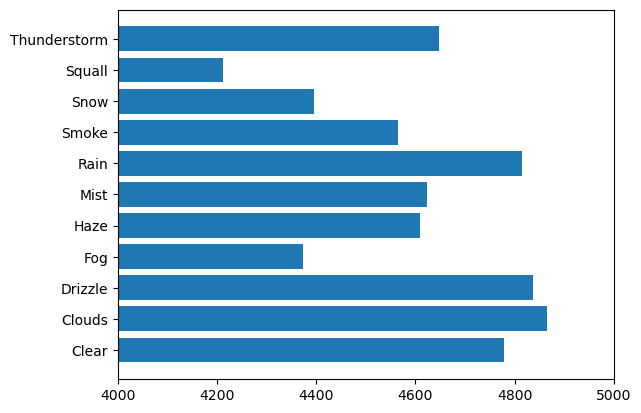

In [48]:
by_weather_main = day_time.copy().groupby("weather_main").mean(numeric_only = True)
by_weather_description = day_time.copy().groupby("weather_description").mean(numeric_only = True)

plt.barh(by_weather_main.index, by_weather_main["traffic_volume"])
plt.xlim([4000,5000])
plt.show()



The only three categories that exceed the 4800 cars value, are "Clouds", "Drizzle" and "Rain". These generalised weather types could be considered to have an impact on the heavy traffic. The averaging process in the use of the mean function might have evened the values that are greater than 5000 (heavy traffic) because of low values. Below we'll try to use a more granular data, i.e. by_weather_description.

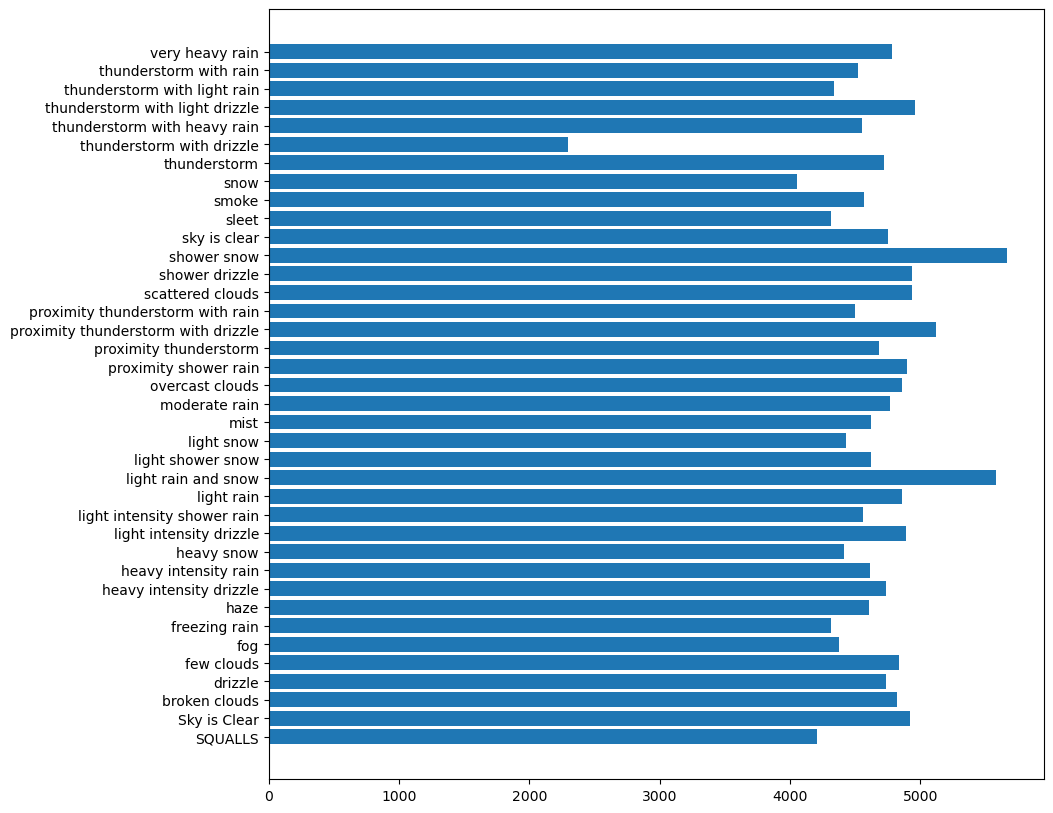

In [54]:
plt.figure(figsize=(10,10))
plt.barh(by_weather_description.index, by_weather_description["traffic_volume"])
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

**Time indicators**
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

**Weather indicators**
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle